In [4]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [5]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};


In [6]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [7]:
vec.get_feature_names_out()


array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [8]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (4, 5)>

In [9]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (3, 5)>

In [11]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


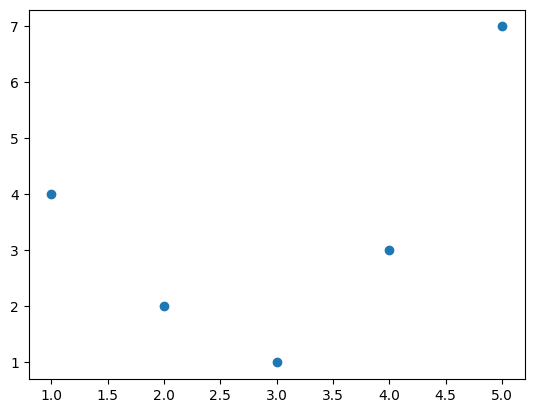

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

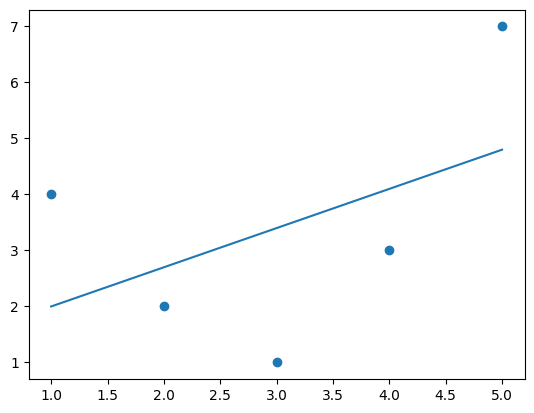

In [14]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


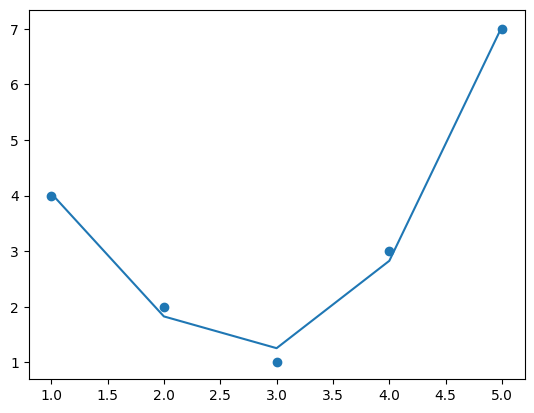

In [16]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

In [17]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [18]:
from sklearn.impute import SimpleImputer #simplpe imputer for missing data
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [19]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [20]:
from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [21]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dailyboardingtotals.csv')
df['service_date'] = pd.to_datetime(df['service_date'])

df = df.sort_values('service_date')
df['prev_day_rides'] = df['total_rides'].shift(1)

#data split
df2023 = df[df['service_date'].dt.year == 2023].dropna()
df2024 = df[df['service_date'].dt.year == 2024].dropna()

X_train = df2023[['prev_day_rides']].values
y_train = df2023['total_rides'].values
X_test = df2024[['prev_day_rides']].values
y_test = df2024['total_rides'].values

In [23]:
df.shape, df2023.shape, df2024.shape

((8886, 6), (365, 6), (366, 6))

Best polynomial degree: 2
2024 Mean Squared Error: 29716003477.22
Best polynomial degree: 2
2024 Mean Squared Error: 29716003477.22
2024 Mean Absolute Error: 139592.20


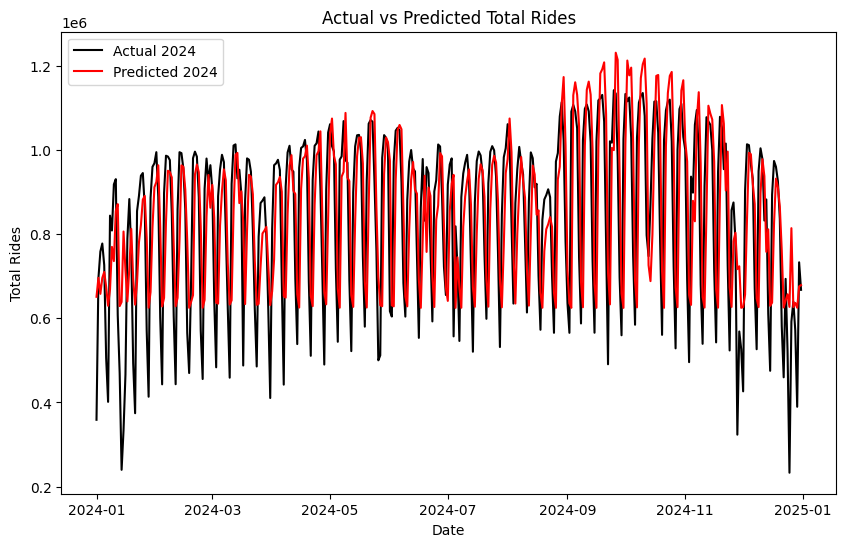

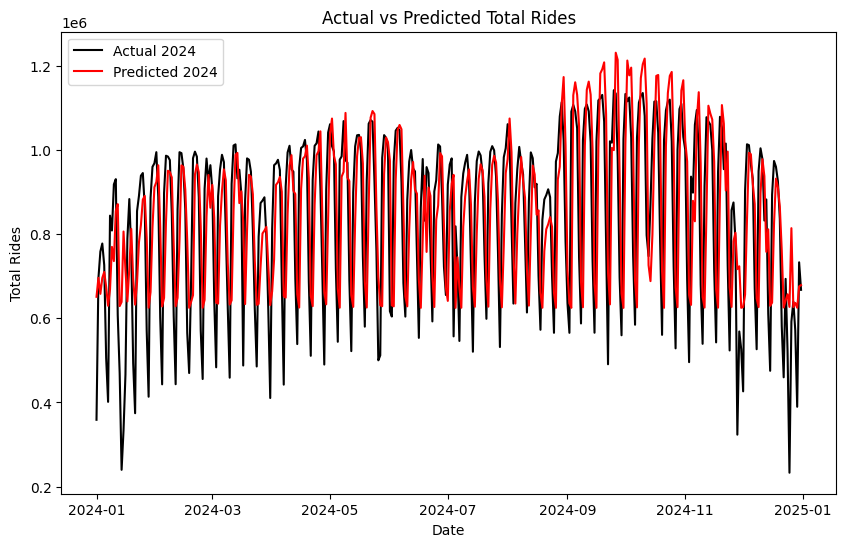

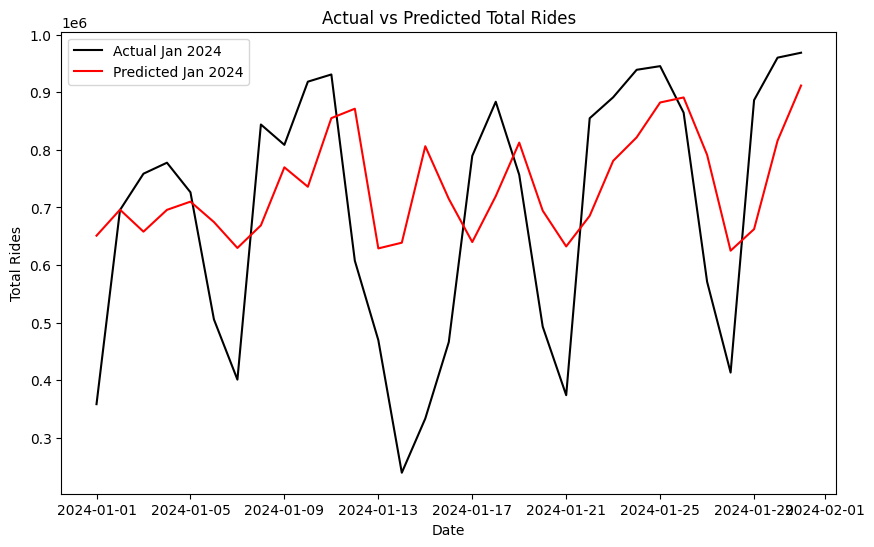

In [ ]:
#POLYNOMIAL AND LINEAR REGRESSION

#deg

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dailyboardingtotals.csv')
df['service_date'] = pd.to_datetime(df['service_date'])

df = df.sort_values('service_date')
df['prev_day_rides'] = df['total_rides'].shift(1)

#data split
df2023 = df[df['service_date'].dt.year == 2023].dropna()
df2024 = df[df['service_date'].dt.year == 2024].dropna()

X_train = df2023[['prev_day_rides']].values
y_train = df2023['total_rides'].values
X_test = df2024[['prev_day_rides']].values
y_test = df2024['total_rides'].values

degree_range = np.arange(1, 8)
train_scores, val_scores = validation_curve(
    make_pipeline(PolynomialFeatures(), LinearRegression()),
    X_train, y_train,
    param_name='polynomialfeatures__degree',
    param_range=degree_range,
    cv=5
)

best_degree = degree_range[np.argmax(np.median(val_scores, axis=1))]

#2023
model = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())
model.fit(X_train, y_train)

#eval 24
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Best polynomial degree: {best_degree}")
print(f"2024 Mean Squared Error: {mse:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

#eval 24
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Best polynomial degree: {best_degree}")
print(f"2024 Mean Squared Error: {mse:.2f}")
print(f"2024 Mean Absolute Error: {mae:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_test[df2024['service_date'].dt.month == 1],
         label='Actual Jan 2024', color='black')
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_pred[df2024['service_date'].dt.month == 1],
         label='Predicted Jan 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

Best polynomial degree: 2
2024 Mean Squared Error: 32132075284.81
Best polynomial degree: 2
2024 Mean Squared Error: 32132075284.81
2024 Mean Absolute Error: 158559.83


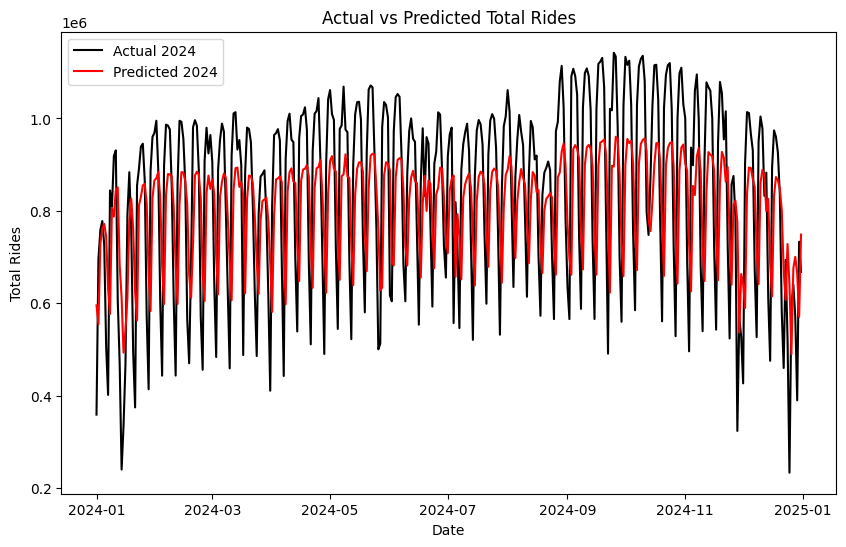

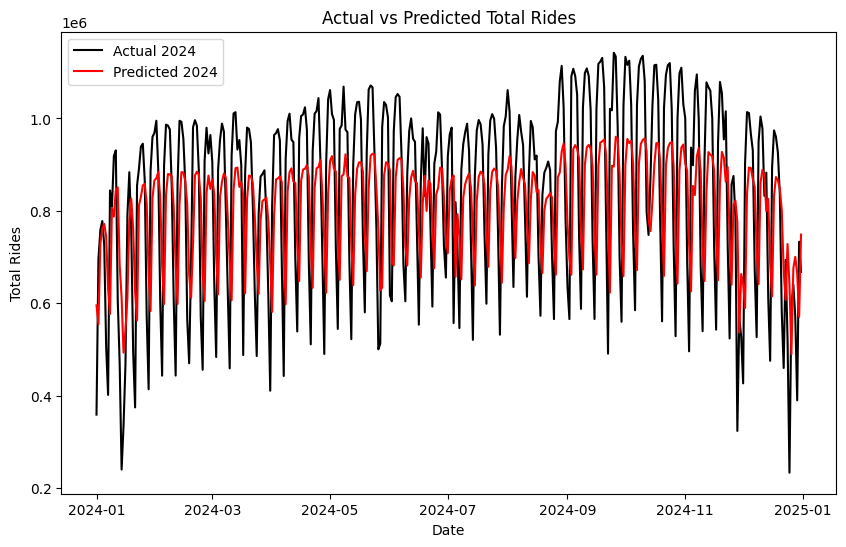

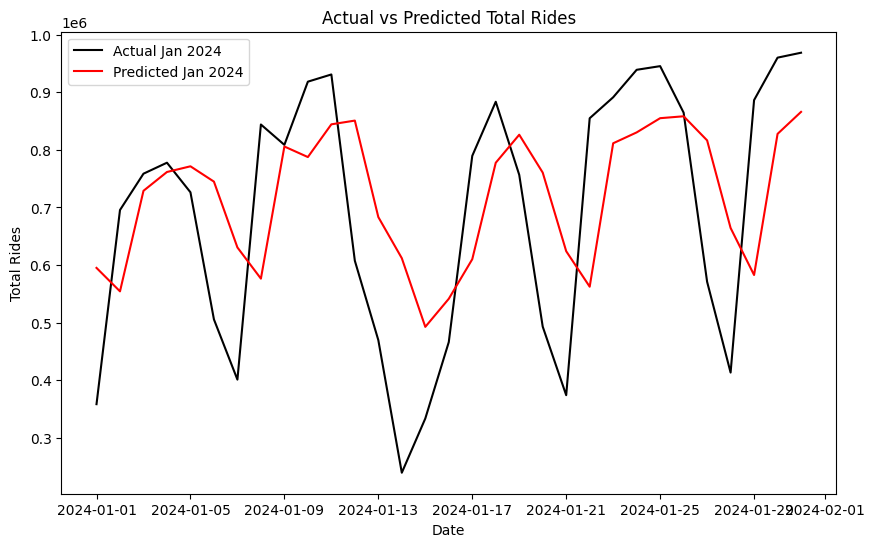

In [ ]:
#PURE LINEAR REGRESSION
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dailyboardingtotals.csv')
df['service_date'] = pd.to_datetime(df['service_date'])

df = df.sort_values('service_date')
df['prev_day_rides'] = df['total_rides'].shift(1)

#data split
df2023 = df[df['service_date'].dt.year == 2023].dropna()
df2024 = df[df['service_date'].dt.year == 2024].dropna()

X_train = df2023[['prev_day_rides']].values
y_train = df2023['total_rides'].values
X_test = df2024[['prev_day_rides']].values
y_test = df2024['total_rides'].values
#deg
# degree_range = np.arange(1, 8)
# train_scores, val_scores = validation_curve(
#     make_pipeline(PolynomialFeatures(), LinearRegression()),
#     X_train, y_train,
#     param_name='polynomialfeatures__degree',
#     param_range=degree_range,
#     cv=5
# )

# best_degree = degree_range[np.argmax(np.median(val_scores, axis=1))]

# #2023
# model = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())
model = make_pipeline(LinearRegression())
model.fit(X_train, y_train)

#eval 24
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Best polynomial degree: {best_degree}")
print(f"2024 Mean Squared Error: {mse:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

#eval 24
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Best polynomial degree: {best_degree}")
print(f"2024 Mean Squared Error: {mse:.2f}")
print(f"2024 Mean Absolute Error: {mae:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_test[df2024['service_date'].dt.month == 1],
         label='Actual Jan 2024', color='black')
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_pred[df2024['service_date'].dt.month == 1],
         label='Predicted Jan 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

Best polynomial degree: 2
2024 Mean Squared Error: 63065034174.31
2024 Mean Absolute Error: 207907.84
Best polynomial degree: 2
2024 Mean Squared Error: 63065034174.31
2024 Mean Absolute Error: 207907.84


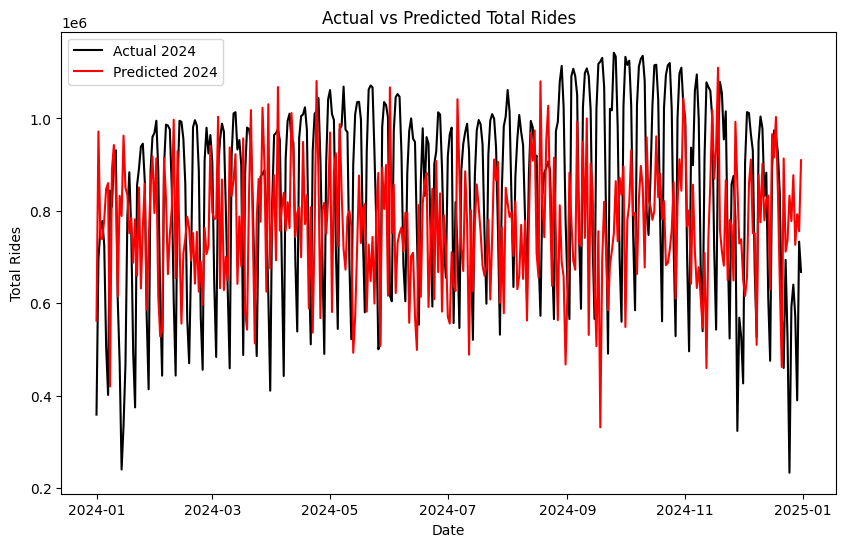

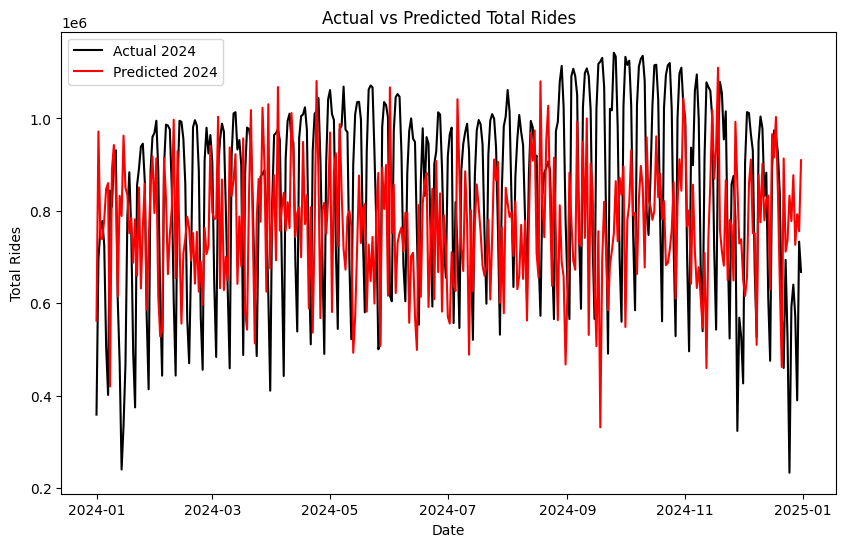

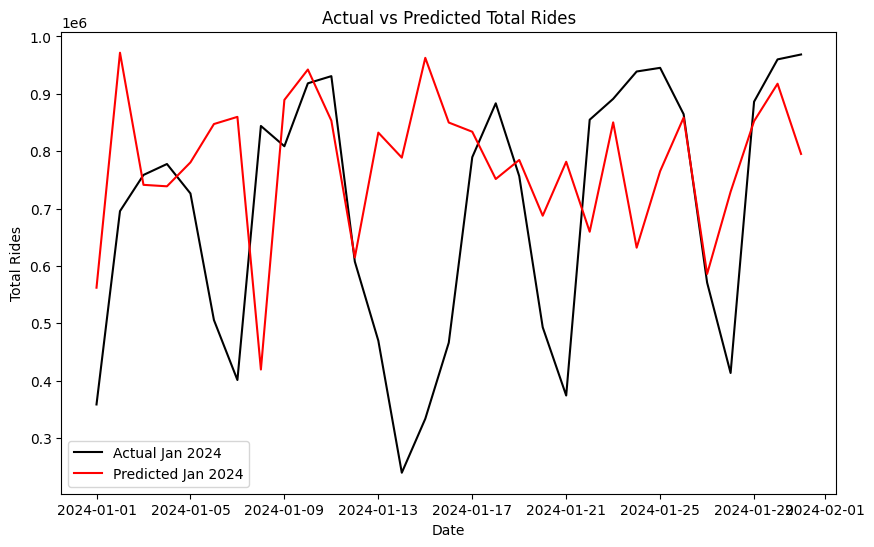

In [ ]:
from sklearn.kernel_approximation import RBFSampler
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dailyboardingtotals.csv')
df['service_date'] = pd.to_datetime(df['service_date'])

df = df.sort_values('service_date')
df['prev_day_rides'] = df['total_rides'].shift(1)

#data split
df2023 = df[df['service_date'].dt.year == 2023].dropna()
df2024 = df[df['service_date'].dt.year == 2024].dropna()

X_train = df2023[['prev_day_rides']].values
y_train = df2023['total_rides'].values
X_test = df2024[['prev_day_rides']].values
y_test = df2024['total_rides'].values

#WEIRD LINEAR REGRESSION
#deg
# degree_range = np.arange(1, 8)
# train_scores, val_scores = validation_curve(
#     make_pipeline(PolynomialFeatures(), LinearRegression()),
#     X_train, y_train,
#     param_name='polynomialfeatures__degree',
#     param_range=degree_range,
#     cv=5
# )

# best_degree = degree_range[np.argmax(np.median(val_scores, axis=1))]

# #2023
# model = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())
model = make_pipeline(RBFSampler(gamma=1.0, n_components=100), LinearRegression())
model.fit(X_train, y_train)

#eval 24
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Best polynomial degree: {best_degree}")
print(f"2024 Mean Squared Error: {mse:.2f}")
print(f"2024 Mean Absolute Error: {mae:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

#eval 24
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Best polynomial degree: {best_degree}")
print(f"2024 Mean Squared Error: {mse:.2f}")
print(f"2024 Mean Absolute Error: {mae:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_test[df2024['service_date'].dt.month == 1],
         label='Actual Jan 2024', color='black')
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_pred[df2024['service_date'].dt.month == 1],
         label='Predicted Jan 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()


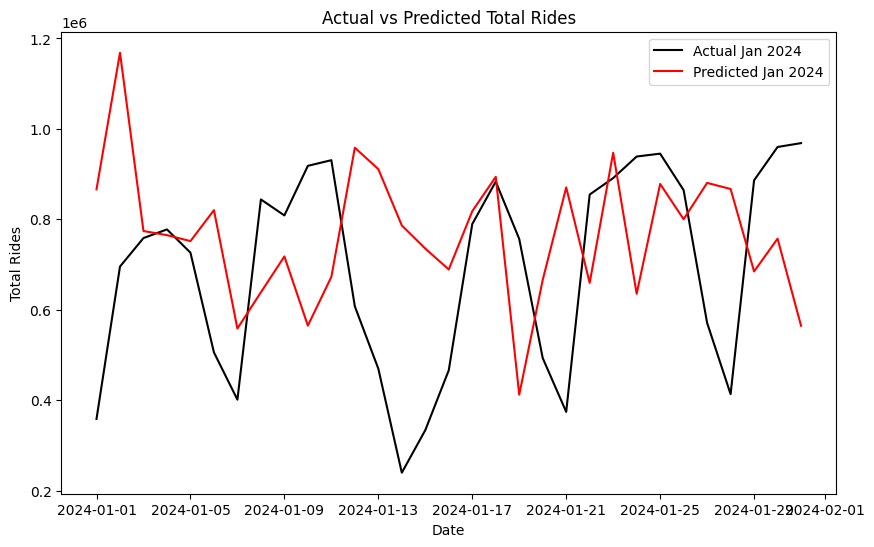

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_test[df2024['service_date'].dt.month == 1],
         label='Actual Jan 2024', color='black')
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_pred[df2024['service_date'].dt.month == 1],
         label='Predicted Jan 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

Best polynomial degree: 2
2023 Mean Squared Error: 26453143528.77


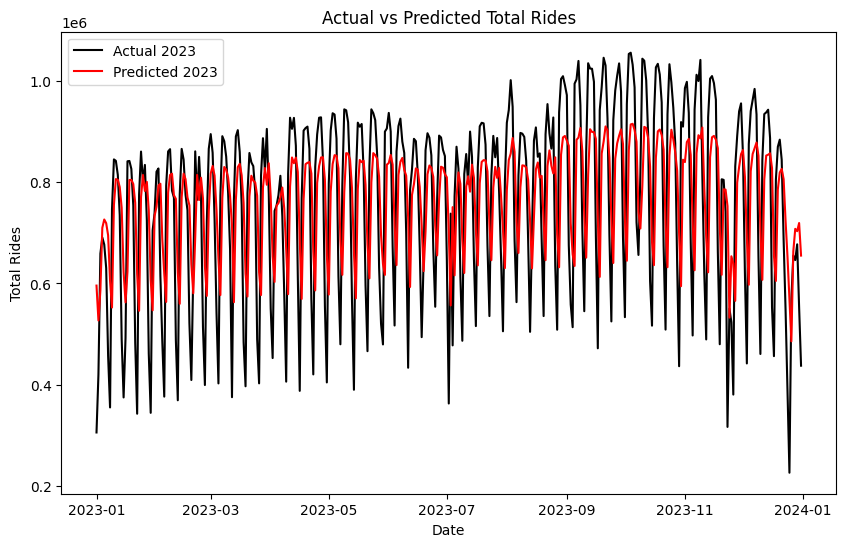

In [29]:
#eval 23
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Best polynomial degree: {best_degree}")
print(f"2023 Mean Squared Error: {mse:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2023['service_date'], y_train, label='Actual 2023', color='black')
plt.plot(df2023['service_date'], y_pred, label='Predicted 2023', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

Best polynomial degree: 2
2024 Mean Squared Error: 15422380880.21
Best polynomial degree: 2
2024 Mean Squared Error: 15422380880.21
2024 Mean Absolute Error: 79148.36


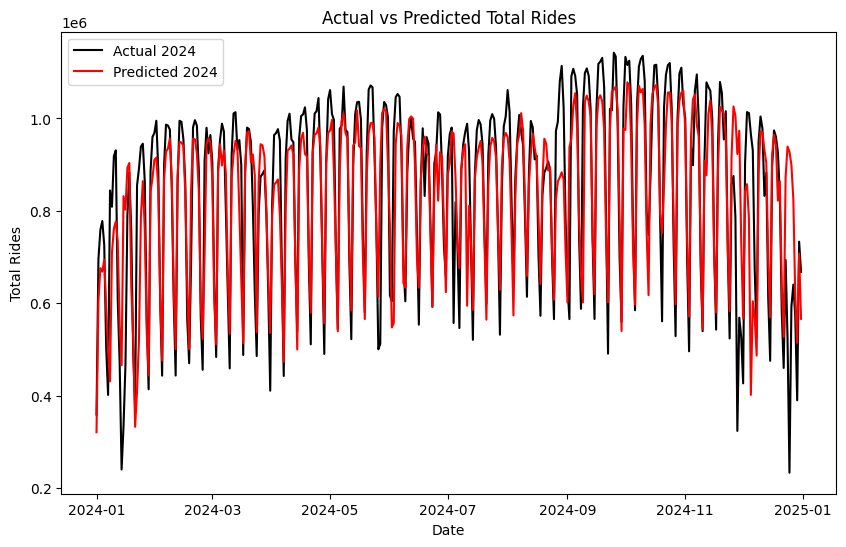

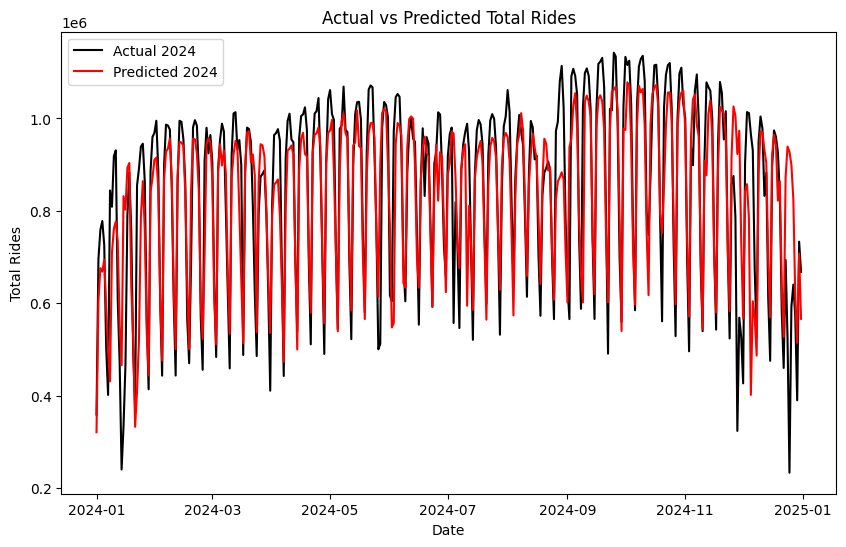

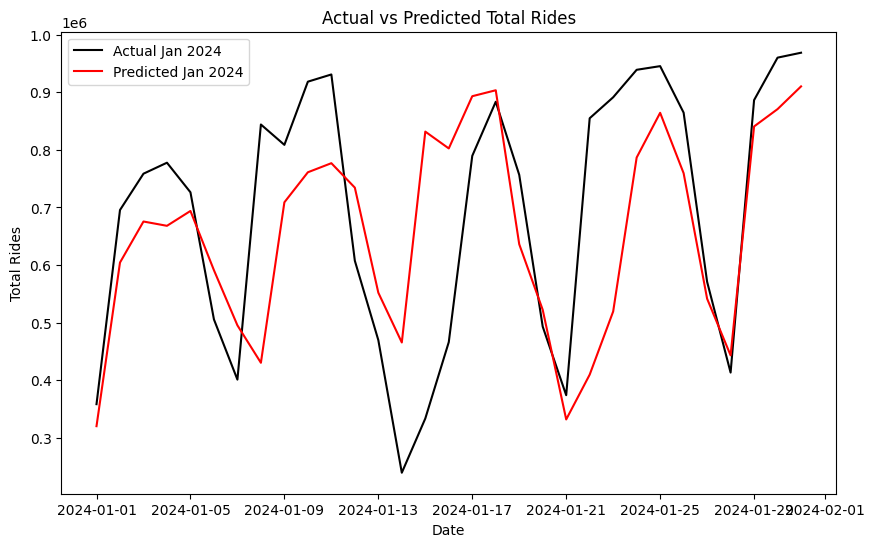

In [48]:
#PURE LINEAR REGRESSION, SHIFT BY 7 DAYS

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dailyboardingtotals.csv')
df['service_date'] = pd.to_datetime(df['service_date'])

df = df.sort_values('service_date')
df['prev_week_rides'] = df['total_rides'].shift(7)

#data split
df2023 = df[df['service_date'].dt.year == 2023].dropna()
df2024 = df[df['service_date'].dt.year == 2024].dropna()

X_train = df2023[['prev_week_rides']].values
y_train = df2023['total_rides'].values
X_test = df2024[['prev_week_rides']].values
y_test = df2024['total_rides'].values

#deg
# degree_range = np.arange(1, 8)
# train_scores, val_scores = validation_curve(
#     make_pipeline(PolynomialFeatures(), LinearRegression()),
#     X_train, y_train,
#     param_name='polynomialfeatures__degree',
#     param_range=degree_range,
#     cv=5
# )

# best_degree = degree_range[np.argmax(np.median(val_scores, axis=1))]

# #2023
# model = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())
model = make_pipeline(LinearRegression())
model.fit(X_train, y_train)

#eval 24
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Best polynomial degree: {best_degree}")
print(f"2024 Mean Squared Error: {mse:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

#eval 24
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Best polynomial degree: {best_degree}")
print(f"2024 Mean Squared Error: {mse:.2f}")
print(f"2024 Mean Absolute Error: {mae:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_test[df2024['service_date'].dt.month == 1],
         label='Actual Jan 2024', color='black')
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_pred[df2024['service_date'].dt.month == 1],
         label='Predicted Jan 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

In [ ]:
#COMPARISON OF 1 DAY V 7 DAY, LIN REGRESSION

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dailyboardingtotals.csv')
df['service_date'] = pd.to_datetime(df['service_date'])

df = df.sort_values('service_date')
df['prev_day_rides'] = df['total_rides'].shift(1)
df['prev_week_rides'] = df['total_rides'].shift(7)


#data split
df2023 = df[df['service_date'].dt.year == 2023].dropna()
df2024 = df[df['service_date'].dt.year == 2024].dropna()

def linRegModel(X_train, y_train, X_test, y_test):
    model = make_pipeline(LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = np.mean(np.abs(y_test - y_pred))
    print(f"2024 Mean Squared Error: {mse:.2f}")
    print(f"2024 Mean Absolute Error: {mae:.2f}")
    return model

#7 days
X_weektrain = df2023[['prev_week_rides']].values
y_weektrain = df2023['total_rides'].values
X_weektest = df2024[['prev_week_rides']].values
y_weektest = df2024['total_rides'].values
modelWeek = linRegModel(X_weektrain, y_weektrain, X_weektest, y_weektest)

#1 day
X_daytrain = df2023[['prev_day_rides']].values
y_daytrain = df2023['total_rides'].values
X_daytest = df2024[['prev_day_rides']].values
y_daytest = df2024['total_rides'].values
modelDay = linRegModel(X_daytrain, y_daytrain, X_daytest, y_daytest)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_test[df2024['service_date'].dt.month == 1],
         label='Actual Jan 2024', color='black')
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_pred[df2024['service_date'].dt.month == 1],
         label='Predicted Jan 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

#

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

#eval 24
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Best polynomial degree: {best_degree}")
print(f"2024 Mean Squared Error: {mse:.2f}")
print(f"2024 Mean Absolute Error: {mae:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_test[df2024['service_date'].dt.month == 1],
         label='Actual Jan 2024', color='black')
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_pred[df2024['service_date'].dt.month == 1],
         label='Predicted Jan 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()